In [33]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from scipy.special import expit

In [34]:
# Load & prepare data
df = pd.read_csv("data (1).csv")
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X, y = df.drop("diagnosis", axis=1), df["diagnosis"]

In [35]:
# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [25]:
# Train model
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [36]:
# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


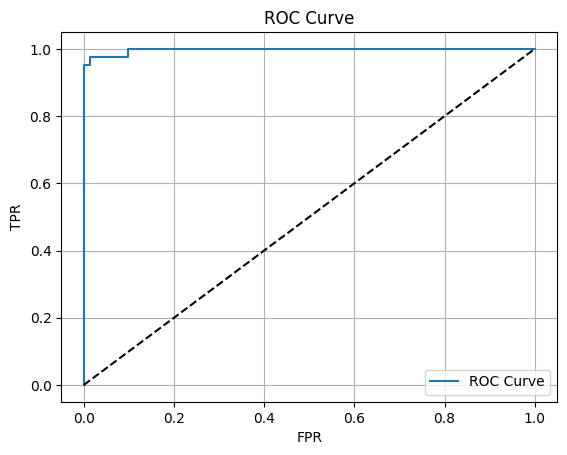

(Text(0.5, 24.0, 'FPR'),
 Text(24.000000000000007, 0.5, 'TPR'),
 Text(0.5, 1.0, 'ROC Curve'),
 None,
 None)

In [37]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve"), plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR"), plt.ylabel("TPR"), plt.title("ROC Curve"), plt.grid(), plt.legend(), plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


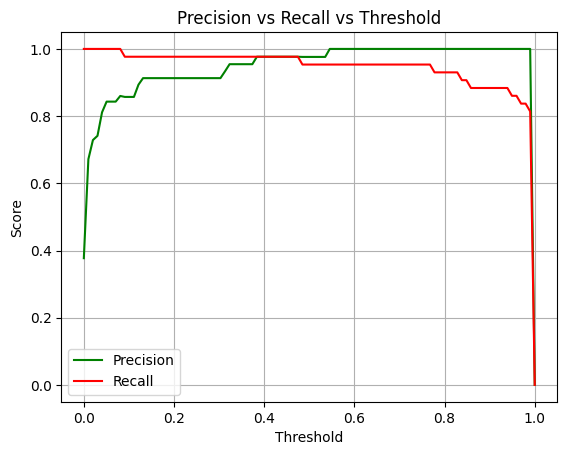

In [38]:
# Threshold Tuning (Precision vs Recall)
thresholds = np.linspace(0, 1, 100)
precisions, recalls = [], []

for t in thresholds:
    preds = (y_prob >= t).astype(int)
    precisions.append(precision_score(y_test, preds))
    recalls.append(recall_score(y_test, preds))

plt.plot(thresholds, precisions, label="Precision", color='green')
plt.plot(thresholds, recalls, label="Recall", color='red')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

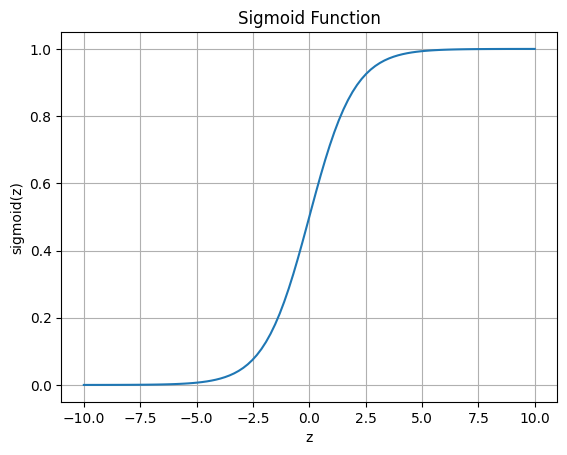

(Text(0.5, 1.0, 'Sigmoid Function'),
 Text(0.5, 24.0, 'z'),
 Text(24.000000000000007, 0.5, 'sigmoid(z)'),
 None,
 None)

In [32]:
# Sigmoid plot
z = np.linspace(-10, 10, 100)
plt.plot(z, expit(z))
plt.title("Sigmoid Function"), plt.xlabel("z"), plt.ylabel("sigmoid(z)"), plt.grid(), plt.show()